# Showcasing Pytesseract Text Extraction

In [33]:
from typing import Dict, List, Union, Tuple, NamedTuple
from collections import namedtuple
# import Image
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import pytesseract
import cv2
from PIL import Image, ImageDraw
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pathlib
from config import CONFIG

In [5]:
import sys
sys.path.insert(1, str(CONFIG.src))

In [6]:
%load_ext autoreload
%autoreload 2

In [8]:
from alignment_test import alignImages
from pyimagesearch.ocr import OCR

In [9]:
ocr = OCR(str(CONFIG.data / "annotations" / "final_project.csv"))

In [17]:
# columns = ["box_name", "x", "y", "w", "h", "image_name", "image_width", "image_height"]
# df = pd.read_csv(CONFIG.data / "annotations" / "labels_ocr_2021-04-11-06-27-41.csv", header=None)
# # df = pd.read_csv(CONFIG.data / "annotations" / "final_project.csv", header=None)
# df.columns = columns
# df.head()

,box_name,x,y,w,h,image_name,image_width,image_height
0,Name,250,118,981,66,f1040--1988-1.png,1553,2042
1,Address,316,181,910,74,f1040--1988-1.png,1553,2042
2,Address,316,249,913,71,f1040--1988-1.png,1553,2042
3,SSN,1221,121,321,66,f1040--1988-1.png,1553,2042
4,Total Income,1275,1609,278,38,f1040--1988-1.png,1553,2042


In [26]:
df_ref = pd.read_csv(CONFIG.data / "annotations" / "    q.csv", header=None)
columns = ["box_name", "x", "y", "w", "h", "image_name", "image_width", "image_height", "stop_words"]
df_ref.columns = columns
df_ref.head()

,box_name,x,y,w,h,image_name,image_width,image_height,stop_words
0,first name and middle initial and last name,260,102,993,106,f1040--1988-1.png,1553,2042,"Your first name and initial(if joint return, a..."
1,Home Address,214,171,1070,108,f1040--1988-1.png,1553,2042,"Prsent home address(number, street, and apt. n..."
2,City,255,220,999,135,f1040--1988-1.png,1553,2042,"City, town or post office, state, and ZIP code"
3,Social Security Number,1191,94,362,126,f1040--1988-1.png,1553,2042,Your social security number
4,Filling Status - Single,250,346,243,135,f1040--1988-1.png,1553,2042,Single


## Single Image Example - form 1040-pg1

In [12]:
im_path = str(CONFIG.data / "imgs" / "f1040--1988-1.png") # image to extract texts
ref_path = str(CONFIG.data / "ref_imgs" / "f1040--1988-1.png") # image for reference

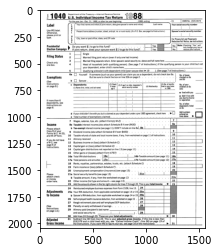

In [13]:
# reference image
template = cv2.imread(ref_path)
plt.imshow(template)

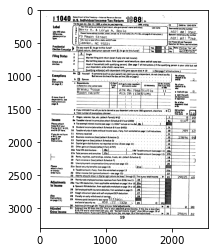

In [14]:
# image to extract text
im = cv2.imread(im_path)
plt.imshow(im)

In [27]:
annotation_file = CONFIG.data / "annotations" /  "intermediate" / "updated_final_project_1.csv"

In [54]:
ocr_pipeline = OCR(str(annotation_file))
ocr_pipeline.start() # required step to start the ocr_pipeline

In [55]:
# Categorize image into form
ocr_pipeline.categorize(im_path)

0

Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...


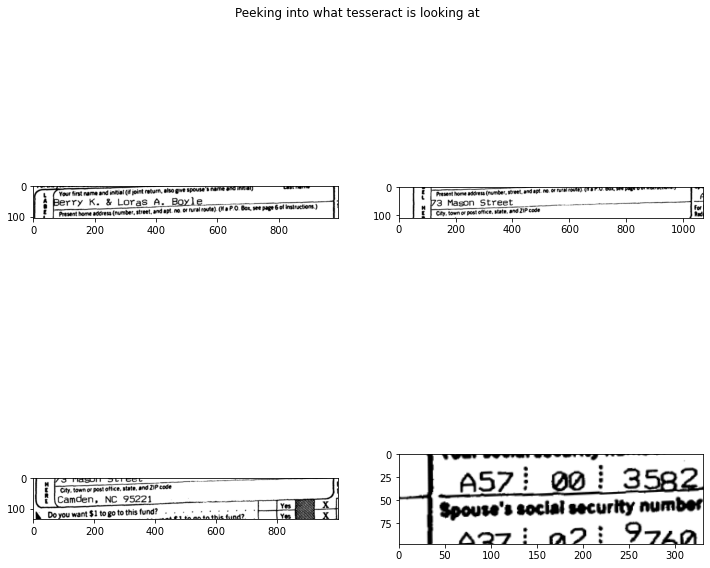

In [56]:
# extract information from categorized form
ocr_pipeline.ocr(im_path, ref_path, 0, debug=True)

In [57]:
ocr_pipeline.parsingResults

[(OCRLocation(id='first name and middle initial and last name', bbox=(260, 102, 993, 106), filter_keywords="your first name and initial(if joint return, also give spouse's name and initial) last name, prsent home address(number, street, and apt. no or rural route). (if a p.o.box, see page 6 of instructions), city, town or post office, state, and zip code, your social security number", form='f1040--1988-1.png'),
  'erry K. & Loras A. Boy]'),
 (OCRLocation(id='Home Address', bbox=(214, 171, 1070, 108), filter_keywords="your first name and initial(if joint return, also give spouse's name and initial) last name, prsent home address(number, street, and apt. no or rural route). (if a p.o.box, see page 6 of instructions), city, town or post office, state, and zip code, your social security number", form='f1040--1988-1.png'),
  'me meme'),
 (OCRLocation(id='Home Address', bbox=(214, 171, 1070, 108), filter_keywords="your first name and initial(if joint return, also give spouse's name and initi

pytesseract was able to extract information that we want such as:
 - The name: Berry K. & Loras A. Boy (it missed B in Berry, however)
pytesseract was not able to filter out noises such as Reds, Aa! ard: Ia. We need to devise a schema for that.

## OCR by form type

We'll perform ocr on about 5000 images.

Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...
Load images...
Perform alignment...
Performing OCR on input image...
Get annotation information...


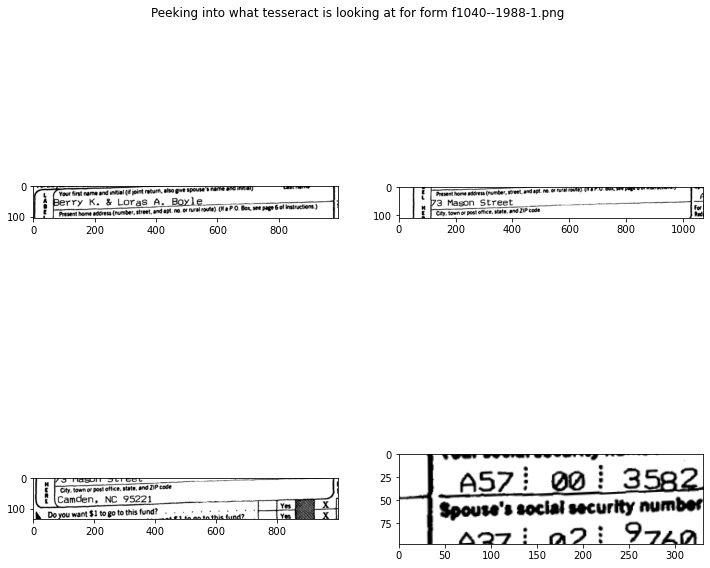

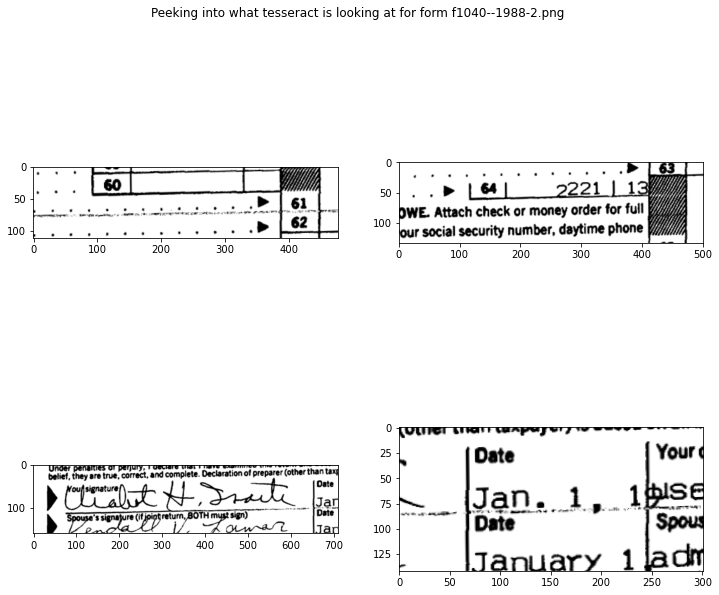

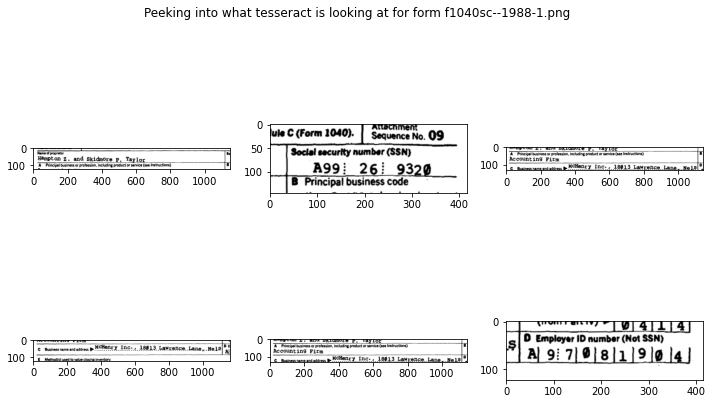

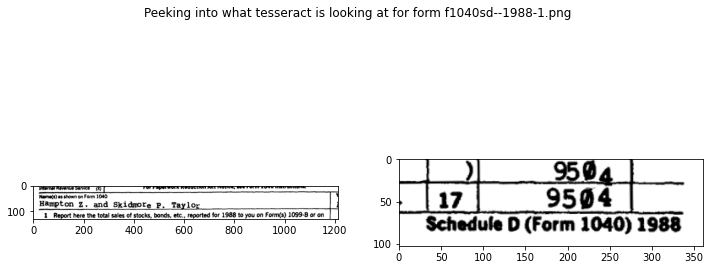

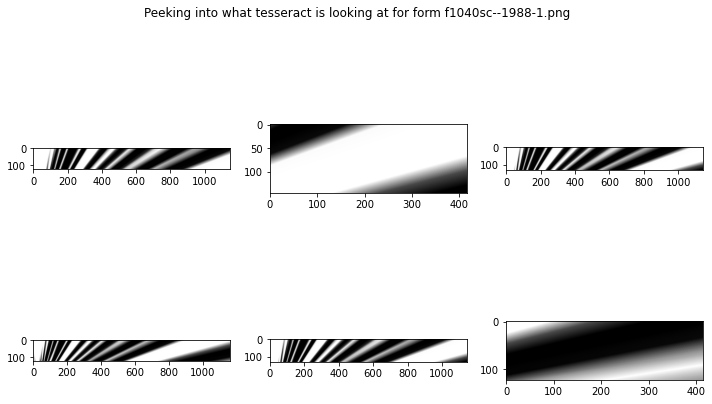

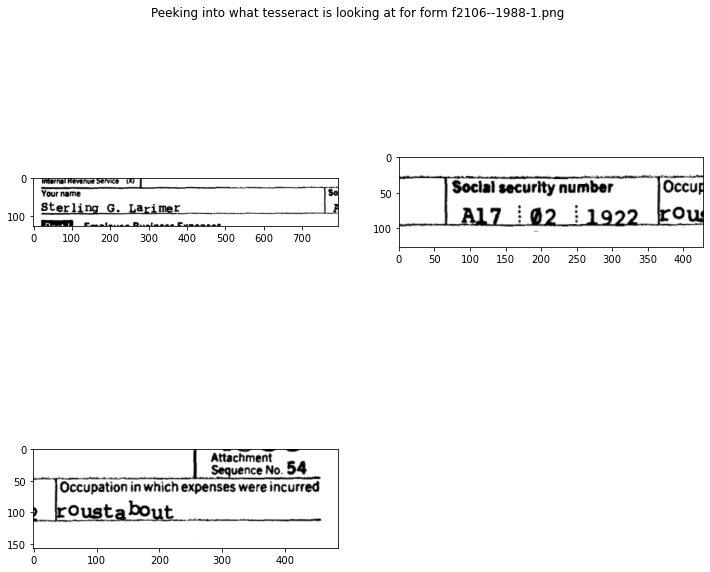

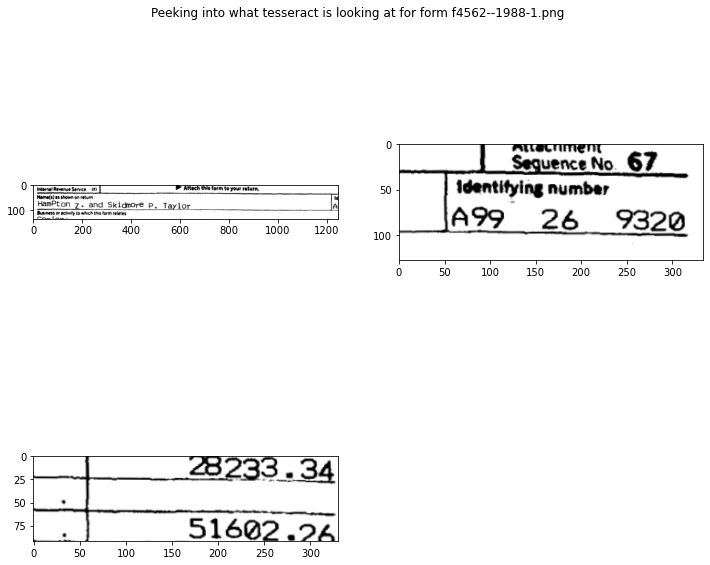

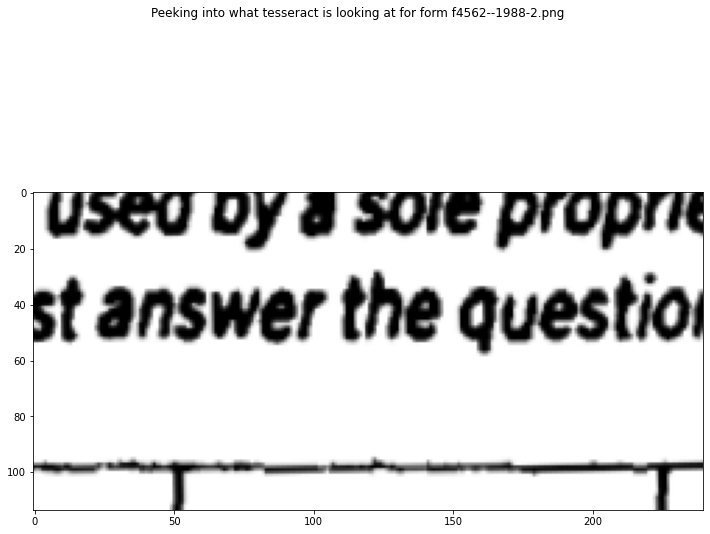

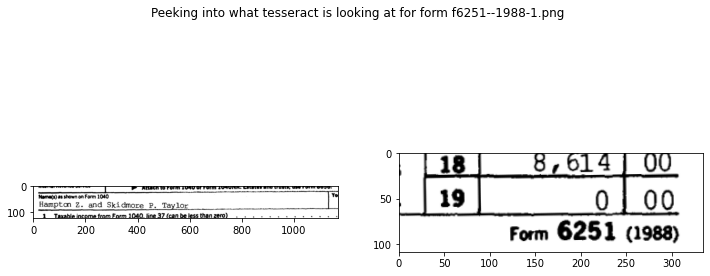

In [87]:
forms = (CONFIG.data / "imgs").glob("*.png")
ref_forms = (CONFIG.data / "ref_imgs").glob("*.png")

for form in list(forms):
    form_id = ocr_pipeline.categorize(str(form))
    if not isinstance(form_id, int):
        continue
    ref_form = next(iter(test_forms.glob(f"*{ocr.id_to_file[form_id]}")))
    ocr_pipeline.ocr(str(form), str(ref_form), form_id, debug=True)


**@Chidie**:

1. form 1040-pg1 bbox4 needs to be more zoomed in

2. form 1040-pg2 bbox3(box 64), bbox4 need to be more zoomed in

3. form 1040sc-pg1 bbox 2, 4 need to be more zoomed in 

4. form f1040sd-pg1 bbox 2 need to be more zoomed in

5. this is just the algo's fault (i think it's the classification algorithm whichs leads to wrong realignment)

6.  form f2016-pg1 all boxes need to be more zoomed in 

7. form f4562-pg1 all boxes need to be more zoomed in

8. form f4562-pg2 this box is just not right somehow (redraw it plz))

9. form f6251 all boxes need to be zoomed in

## OCR pipeline for all images

In [88]:
data_forms = CONFIG.data / "sd02"
imgs_to_extract = list(data_forms.glob("**/*.png"))
test_forms = (CONFIG.data / "ref_imgs")

imgs_to_extract[:2], len(imgs_to_extract)


([WindowsPath('C:/Users/tnguy/personal_projects/EnhanceIT/capstone/data/sd02/data/sfrs_0/r0000/r0000_00.png'),
  WindowsPath('C:/Users/tnguy/personal_projects/EnhanceIT/capstone/data/sd02/data/sfrs_0/r0000/r0000_01.png')],
 5590)

We'll perform ocr on 5590 images

In [90]:
def ocr_on_imgs(data: List[str], ref_forms: pathlib.WindowsPath, ocr_pipeline: OCR) -> None:
    """Perform ocr on data
    
    Args:
         data (List[str]): all images to perform ocr
         ref_forms (pathlib.WindowsPath): reference forms
         ocr_pipeline (OCR): the ocr pipeline"""
    for form in list(forms):
        form_id = ocr_pipeline.categorize(str(form))
        if not isinstance(form_id, int):
            continue
        ref_form = next(iter(test_forms.glob(f"*{ocr.id_to_file[form_id]}")))
        ocr_pipeline.ocr(str(form), str(ref_form), form_id, debug=True)

ocr_on_imgs(imgs_to_extract, test_forms, ocr_pipeline)


In [91]:
ocr_on_imgs(imgs_to_extract, test_forms, ocr_pipeline)

In [93]:
# Results will be stored in parsingResults as a namedtuple
ocr_pipeline.parsingResults

me of proprietor, social security number(ssn), principal business or profession,including product or service(see instructions), business name and address, principal business code, employee id number(not ssn)', form='f1040sc--1988-1.png'),
  'lule C (Form 1040).'),
 (OCRLocation(id='Social security number', bbox=(1092, 122, 416, 145), filter_keywords='name of proprietor, social security number(ssn), principal business or profession,including product or service(see instructions), business name and address, principal business code, employee id number(not ssn)', form='f1040sc--1988-1.png'),
  'A99: 2 9328'),
 (OCRLocation(id='Principal business', bbox=(14, 206, 1143, 132), filter_keywords='name of proprietor, social security number(ssn), principal business or profession,including product or service(see instructions), business name and address, principal business code, employee id number(not ssn)', form='f1040sc--1988-1.png'),
  'ae ee BM OKLUMvTe PF. +aylor'),
 (OCRLocation(id='Principal b